# Latar Belakang
TransJakarta adalah sistem transportasi bus rapid transit (BRT) yang beroperasi di Jakarta. Pemerintah DKI Jakarta dan PT TransJakarta terus melakukan evaluasi dan perluasan jaringan TransJakarta guna meningkatkan konektivitas transportasi publik di Jakarta. Perubahan dan perbaikan terus dilakukan oleh pihak TransJakarta untuk mengatasi permasalahan dan meningkatkan kualitas layanan. Perusahaan Transjakarta ingin mengoptimalkan pelayanan dengan mempertimbangkan penambahan atau pengurangan pada rute dengan penumpang yang tinggi.

# Pernyataan Masalah
Perusahaan ingin mengetahui rute mana saja yang memiliki potensi paling tinggi serta jumlah penumpang yang padat untuk dijadikan tujuan dalam pengembangan transportasi, apakah diperlukannya penambahan armada atau tidak di trayek tertentu sehingga dapat mengoptimalkan pelayanan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

### Data Explanation
Dataset TransJakarta Passengers 2021 memiliki 1473 baris dengan 6 kolom yaitu:
- tahun: tahun dari data yang dimiliki
- bulan: bulan dari data yang dimiliki
- jenis: jenis bus yang digunakan
- kode trayek: kode trayek yang dimiliki
- trayek: nama trayek yang dimiliki
- jumlah penumpang: jumlah penumpang yang dimilik

In [157]:
df=pd.read_csv('TransJakarta Passengers 2021.csv')
display(df.head(),df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


### Data Understanding and Cleaning

Sebelum kita memulai analisis, penting untuk memahami dataset kita dengan lebih baik melalui tahap "pemahaman data". Dalam proses ini, kita akan dapat mengetahui anomali-anomali yang ada dalam dataset kita dan perlu diperhatikan saat melakukan tahap "pembersihan data". Setiap tindakan yang diambil untuk menangani anomali akan disertai dengan alasan yang didasarkan pada pengetahuan domain maupun statistik.

Pertama, mari kita periksa informasi tentang dataset Penumpang TransJakarta tahun 2021.

In [158]:
print(f'total baris kolom di dataset df: {df.shape}')
df.info()

total baris kolom di dataset df: (1473, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [159]:
display(df.describe(), df.describe(include='object'))

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [160]:
pd.set_option('display.max_colwidth', 1)
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': [df[col].isna().sum() for col in df.columns],
    '%null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,tahun,int64,0,0.000000,1,[2021]
1,bulan,int64,0,0.000000,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,object,0,0.000000,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,object,0,0.000000,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,object,2,0.135777,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,int64,0,0.000000,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923,

### Missing Value

In [161]:
df.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

<Axes: >

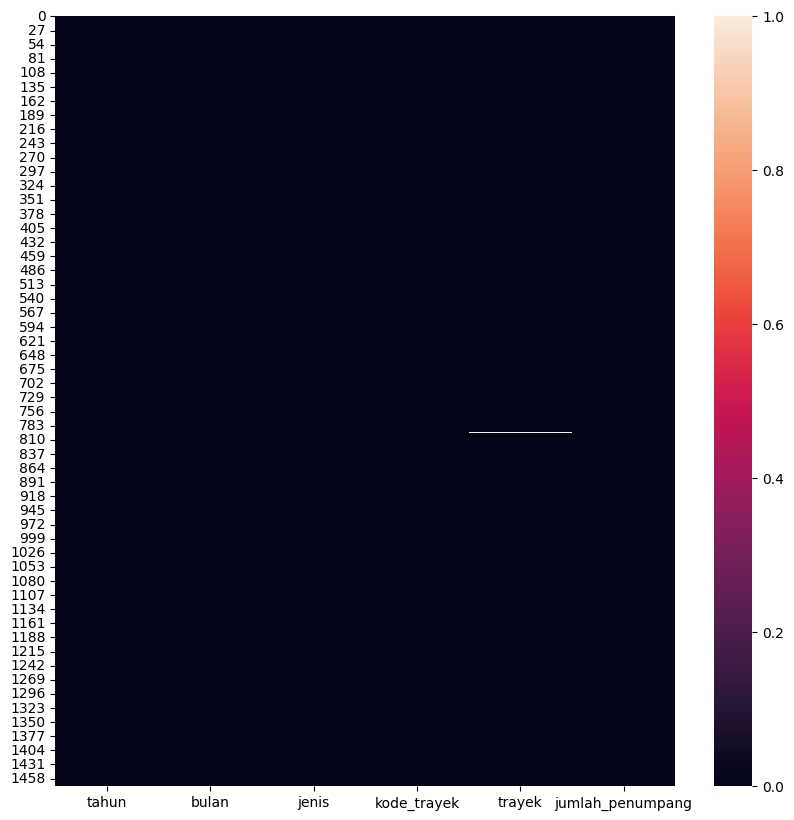

In [162]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['tahun','bulan','jenis','kode_trayek','trayek','jumlah_penumpang']].isna())

In [163]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

tahun               0.000000
bulan               0.000000
jenis               0.000000
kode_trayek         0.000000
trayek              0.135777
jumlah_penumpang    0.000000
dtype: float64

In [164]:
#hapus data yang kosong
df = df.dropna()

### Checking Data Duplikat

In [165]:
# cek duplikat
print(f'jumlah data duplikat: {df[df.duplicated()].shape[0]}')

jumlah data duplikat: 0


In [166]:
#saving data cleaning
df.describe()
df.to_csv("cleaning.csv")

Dari data diatas, kita bisa melihat bahwa:

- Dataset Transjakarta Passengers 2021 memiliki 1473 baris dan 6 kolom
- Setelah dilakukan drop missing value kita memiliki 1471 baris.
- Terdapat data kosong pada kolom trayek yaitu dengan isi datanya adalah NaN. Pada index ke 795 dan 796.

### Data Analysis

In [167]:
df['jumlah_penumpang'].max()

1131439

### Berdasarkan asal Trayek  

Pertama, mari kita lihat bagaimana pengaruh trayek yang digunakan terhadap jumlah penumpang yang digunakan. Kita akan menganalisis kolom  `trayek` dan `jumlah_penumpang` untuk menjawab beberapa pertanyaan.

* Trayek yang memiliki paling banyak jumlah penumpang?

In [168]:
df['trayek'].value_counts()

trayek
Cililitan - Condet via Kayu Manis              24
Terminal Tanjung Priok - Ancol Barat           12
Batu Sari-Tanah Abang                          12
Kebayoran Lama - Jelambar                      12
Blok M - Kota                                  12
                                               ..
Ragunan - Departemen Pertanian                 1 
Kampung Melayu - Pulo Gadung                   1 
Gondangdia - Cikini via Kramat Jaya            1 
Dukuh Atas - Casablanca via Epicentrum Raya    1 
Pelabuhan Kaliadem - Kota                      1 
Name: count, Length: 136, dtype: int64

Dari di atas, trayek Cililitan - Condet via Kayu Manis memiliki total 24 keberengkatan selama 12 bulan di tahun 2021. Namun jika dilihat berdasarkan banyaknya jumlah penumpang, rute Blok M - Kota memiliki jumlah penumpang terbanyak. Sehingga kita akan memilih trayek Blok M - Kota untuk dapat dilakukan analisa lebih lanjut.

### Variabel khusus yang akan diteliti (Blok M - Kota)


In [169]:
df2 = df[df['trayek'] == 'Blok M - Kota'].sort_values(by = 'bulan')
df2

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
572,2021,1,BRT,1,Blok M - Kota,773717
1061,2021,2,BRT,1,Blok M - Kota,799708
328,2021,3,BRT,1,Blok M - Kota,1013221
1306,2021,4,BRT,1,Blok M - Kota,1003534
692,2021,5,BRT,1,Blok M - Kota,937452
450,2021,6,BRT,1,Blok M - Kota,899829
1182,2021,7,BRT,1,Blok M - Kota,344528
204,2021,8,BRT,1,Blok M - Kota,462959
939,2021,9,BRT,1,Blok M - Kota,735653
82,2021,10,BRT,1,Blok M - Kota,903783


In [170]:
df_gabung = df.groupby(['tahun', 'bulan', 'jenis', 'trayek'])['jumlah_penumpang'].sum().reset_index()
df2 = df_gabung[df_gabung['trayek'] == 'Blok M - Kota'].sort_values(by = 'bulan')
df2

,tahun,bulan,jenis,trayek,jumlah_penumpang
37,2021,1,BRT,Blok M - Kota,773717
155,2021,2,BRT,Blok M - Kota,799708
276,2021,3,BRT,Blok M - Kota,1013221
397,2021,4,BRT,Blok M - Kota,1003534
521,2021,5,BRT,Blok M - Kota,937452
642,2021,6,BRT,Blok M - Kota,899829
765,2021,7,BRT,Blok M - Kota,344528
888,2021,8,BRT,Blok M - Kota,462959
1009,2021,9,BRT,Blok M - Kota,735653
1130,2021,10,BRT,Blok M - Kota,903783


### Line Plot

Text(0.5, 1.0, 'Blok M - Kota')

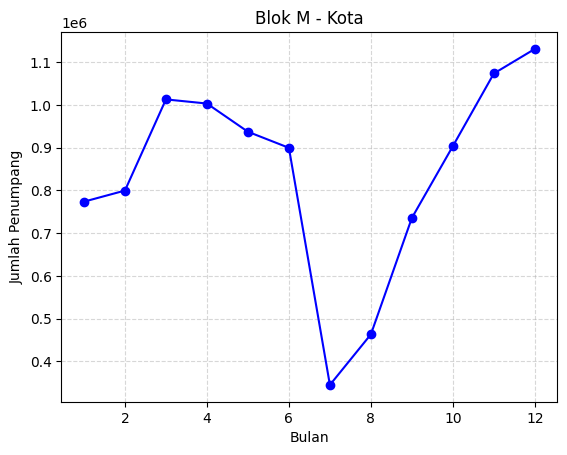

In [171]:
plt.plot(df2['bulan'], df2['jumlah_penumpang'], marker='o', linestyle='-', color='blue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Blok M - Kota')

Grafik line plot tersebut terlihat jumlah penumpang menurun pada bulan 7 dan jumlah penumpang tertinggi berada pada bulan 12. sehingga diagram tersebut menunjukkan diagram yang fluktuasi.

### Uji Mann Whitney

1. Hipotesis
- H0 : Tidak ada perbedaan antara kedua kelompok 
- H1 : Terdapat perbedaan antara kedua kelompok 
2. Tingkat Signifikansi
α = 5% = 0.05
3. Daerah Kritis
Tolak H0 jika P-value < α

In [181]:
jumlah_penumpang1 = df2['jumlah_penumpang'][:6]
jumlah_penumpang2 = df2['jumlah_penumpang'][6:]

U, mw_p_value = stats.mannwhitneyu(jumlah_penumpang1, jumlah_penumpang2, alternative='two-sided')
U, mw_p_value

(21.0, 0.6991341991341992)

In [182]:
if mw_p_value > 0.05:
  print(f'P-Value: {mw_p_value}, Dibutuhkan penambahan armada pada trayek Blok M - Kota')
else:
  print(f'P-Value: {mw_p_value}, Tidak dibutuhkan penambahan armada pada trayek Blok M - Kota')

P-Value: 0.6991341991341992, Dibutuhkan penambahan armada pada trayek Blok M - Kota


4. Statistik Uji
p-value = 0.6991341991341992
α = 0,05
Sehingga p-value (0.6991341991341992) > (0,05)
5. Keputusan
Karena nilai p-value (0.6991341991341992) < (0,05) maka keputusannya adalah gagal tolak H0.

Berdasarkan hasil ini, dapat menyimpulkan bahwa tidak ada perbedaan yang signifikan antara jumlah penumpang dalam kelompok 1 (bulan 1-6) dan kelompok 2 (bulan 7-12) pada trayek Blok M - Kota dan selalu mengalami kenaikan.

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang kandidat yang ingin direkrut:
1. Trayek Blok M - Kota merupakan top 10 trayek paling banyak, yaitu dengan total 12 keberangkatan selama 12 bulan di tahun 2021
2. Jumlah Penumpang Terbanyak berada pada trayek Blok M - Jakarta sebesar 107.079.752.
3. Keberangkatan dengan jumlah penumpang paling sedikit adalah pada bulan 7 dengan total penumpang 344528, dan Keberangkatan dengan jumlah penumpang paling banyak adalah pada bulan 12 dengan total penumpang 1131439.
4. Nilai statistik sebesar 21.0 merujuk pada nilai U atau W dalam uji Mann-Whitney. Ini adalah jumlah peringkat dari salah satu kelompok yang lebih rendah dari yang diharapkan jika kedua kelompok berasal dari distribusi yang sama. Artinya uji U 21.0 yang mengindikasikan jumlah peringkat yang lebih rendah dari kelompok 1 dibandingkan dengan kelompok 2.
5. Nilai p-value adalah nilai probabilitas yang menunjukkan signifikansi statistik dari perbedaan antara kedua kelompok. Dalam kasus ini, nilai p-value adalah 0.6991341991341992, maka tingkat signifikansi sebesar 0.6991341991341992 lebih besar dari 0.05, maka tidak ada cukup bukti untuk menolak hipotesis nol, yang berarti tidak ada perbedaan yang signifikan antara kedua kelompok dalam hal jumlah penumpang.


Rekomendasi dari hasil analisis yang diperoleh antara lain:

1. Dalam hasil Uji Mann-Whitney,  nilai p-value adalah 0.6991341991341992 yaitu gagal tolak H0 maka dibutuhkan penambahan armada pada trayek Blok M - Kota.
2. Dengan kenaikan tren setiap bulannya sehingga kepadatan penumpang akan lebih banyak di tahun 2022 
3. Dibutuhkan penambahan armada BRT di trayek Blok M - Kota
4. Mengalokasikan BRT di bulan 10 hingga bulan 12 lebih banyak dikarenakan kenaikan jumlah penumpang yang tinggi